In [1]:
from math import *
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from CH4eMetricEmissions import functions as CH4efunctions
from CO2eMetricEmissions import functions as CO2efunctions
from CO2eMetricEmissions import functionsMatrix as CO2efunctionsMatrix

/Users/student/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# CO2 Equivalent Testing

## Testing the basic Metric Emissions tool

This tool takes in a dataframe consisting of a "Year" column and an "SLCP Emissions" column and computes a collection of CO2 equivalent emissions pertaining to different metrics.

In [2]:
# Make step change emissions series with emissions of SLCP (CH4) rising from 0 to 1 at the year 2000

TimePeriod = 349  # Years
SLCPEmissions = np.ones(TimePeriod).tolist()
SLCPEmissions[0:149] = np.zeros(150).tolist()
Years = np.arange(1850, 2200).tolist()

SLCPTimeSeries = pd.DataFrame(data={'Year': Years, 'SLCP Emissions': SLCPEmissions})
SLCPTimeSeries.head()

,Year,SLCP Emissions
0,1850,0.0
1,1851,0.0
2,1852,0.0
3,1853,0.0
4,1854,0.0


In [3]:
# AddMetricEmissions used on the SLCPTimeSeries 

CH4StepTestEmissionsOutput = CO2efunctionsMatrix.addCH4MetricEmsColumns(SLCPTimeSeries)
CH4StepTestEmissionsOutput.tail()


,Year,SLCP Emissions,CFE,GWP*,CGWP,CGTP,GWP100,GWP20,GTP100,GTP20
345,2195,1.0,4.704215,7.0,0.0,0.0,28.0,84.0,4.0,67.0
346,2196,1.0,4.683492,7.0,0.0,0.0,28.0,84.0,4.0,67.0
347,2197,1.0,4.663046,7.0,0.0,0.0,28.0,84.0,4.0,67.0
348,2198,1.0,4.642871,7.0,0.0,0.0,28.0,84.0,4.0,67.0
349,2199,1.0,4.622964,7.0,0.0,0.0,28.0,84.0,4.0,67.0


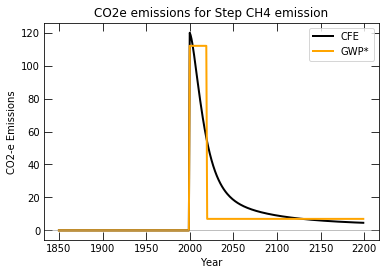

In [4]:
t = CH4StepTestEmissionsOutput['Year']
s = CH4StepTestEmissionsOutput['CFE']
v = CH4StepTestEmissionsOutput['GWP*']

fig, (ax) = plt.subplots()
ax.plot(t, s, color = 'black',linewidth = 2,label='CFE')
ax.plot(t, v, color = 'orange',linewidth = 2,label='GWP*')
ax.tick_params(axis='both',direction='in',length=8,right=True,top=True)
plt.legend()
ax.axhline(linewidth = 0.5, color='gray')

ax.set(xlabel='Year', ylabel='CO2-e Emissions',
       title='CO2e emissions for Step CH4 emission')
plt.show()

## Testing the GIR Input Style metric tool

This version takes in a range of scenarios and gases using the same format used in GIR. For each metric "method" specified a new "scenario" will be added to the returned dataframe for each original "scenario" in the GIR input. This allows us to quickly go from a multi-gas set of input emissions to a broad range of equivalents, and model their temperature impacts, without the need for reformatting.

Methods can include "CFE", "GWP*", "CGWP", "CGTP", "GWP100", "GWP20", "GTP100", "GTP20"

In [5]:
# GIRTestScenarioNames = ['Pulse','Step']

start_year = 1850
end_year = 2200
timestep = 1
scen_names=['Pulse','Step']
gases_in = ['CO2','CH4','N2O']

CH4GIREmissions = pd.DataFrame(index=np.arange(start_year,end_year+1,timestep)+(timestep!=1)*timestep/2,columns=pd.MultiIndex.from_product([scen_names,gases_in],names=['Scenario','Gas'])).fillna(0).apply(pd.to_numeric)
CH4GIREmissions.index.rename('Year',inplace=True)

TimePeriod = 351  # Years
Years = np.arange(1850, 2200).tolist()

# Pulse Emissions
PulseSLCPEmissions = np.zeros(TimePeriod).tolist()
PulseSLCPEmissions[150] = 1

# Step Emissions
StepSLCPEmissions = np.ones(TimePeriod).tolist()
StepSLCPEmissions[0:150] = np.zeros(150).tolist()

# Non-Metric Gas Emissions
CH4GIREmissions['Pulse','CH4'] = PulseSLCPEmissions
CH4GIREmissions['Step','CH4'] = StepSLCPEmissions

CH4GIREmissions.head()

Scenario Pulse          Step         
Gas        CO2  CH4 N2O  CO2  CH4 N2O
Year                                 
1850.0       0  0.0   0    0  0.0   0
1851.0       0  0.0   0    0  0.0   0
1852.0       0  0.0   0    0  0.0   0
1853.0       0  0.0   0    0  0.0   0
1854.0       0  0.0   0    0  0.0   0

In [6]:
Methods = ["CFE", "GWP*"]

CO2eGIR = CO2efunctionsMatrix.addCO2eMetricEmissions(CH4GIREmissions, Methods)

In [7]:
CO2eGIR.tail()

Scenario Pulse          Step          Pulse - CFE           Pulse - GWP*       \
Gas        CO2  CH4 N2O  CO2  CH4 N2O         CO2  CH4  N2O          CO2  CH4   
Year                                                                            
2196.0       0  0.0   0    0  1.0   0   -0.020723  0.0  0.0          0.0  0.0   
2197.0       0  0.0   0    0  1.0   0   -0.020447  0.0  0.0          0.0  0.0   
2198.0       0  0.0   0    0  1.0   0   -0.020174  0.0  0.0          0.0  0.0   
2199.0       0  0.0   0    0  1.0   0   -0.019907  0.0  0.0          0.0  0.0   
2200.0       0  0.0   0    0  1.0   0   -0.019644  0.0  0.0          0.0  0.0   

Scenario      Step - CFE           Step - GWP*            
Gas       N2O        CO2  CH4  N2O         CO2  CH4  N2O  
Year                                                      
2196.0    0.0   4.683492  0.0  0.0         7.0  0.0  0.0  
2197.0    0.0   4.663046  0.0  0.0         7.0  0.0  0.0  
2198.0    0.0   4.642871  0.0  0.0         7.0  0.0  0.0  
2199.0    0.0   4.622964  0.0  0.0         7.0  0.0  0.0  
2200.0    0.0   4.603321  0.0  0.0         7.0  0.0  0.0

# CH4 Equivalent Testing

## Testing the basic Metric Emissions tool

This tool takes in a dataframe consisting of a "Year" column and an "LLCP Emissions" column and computes a collection of CH4 equivalent emissions pertaining to different metrics.

In [11]:
# Make step change emissions series with emissions of SLCP (CH4) rising from 0 to 1 at the year 2000

TimePeriod = 349  # Years
LLCPEmissions = np.ones(TimePeriod).tolist()
LLCPEmissions[0:149] = np.zeros(150).tolist()
Years = np.arange(1850, 2200).tolist()


LLCPTimeSeries = pd.DataFrame(data={'Year': Years, 'LLCP Emissions': LLCPEmissions})

LLCPTimeSeries.head()

,Year,LLCP Emissions
0,1850,0.0
1,1851,0.0
2,1852,0.0
3,1853,0.0
4,1854,0.0


In [12]:
# AddMetricEmissions used on the LLCPTimeSeries 

CO2StepTestEmissionsOutput = CH4efunctions.addMetricEmissions(LLCPTimeSeries)
CO2StepTestEmissionsOutput.tail()

/Users/student/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Year,LLCP Emissions,CFE,GWP*,CGWP,CGTP,GWP100,GWP20,GTP100,GTP20
345,2195,1.0,0.060205,0.067934,0.045581,0.052973,0.035714,0.011905,0.25,0.014925
346,2196,1.0,0.060431,0.067934,0.045814,0.053243,0.035714,0.011905,0.25,0.014925
347,2197,1.0,0.060657,0.067934,0.046047,0.053514,0.035714,0.011905,0.25,0.014925
348,2198,1.0,0.060883,0.067934,0.046279,0.053784,0.035714,0.011905,0.25,0.014925
349,2199,1.0,0.061109,0.067934,0.046512,0.054054,0.035714,0.011905,0.25,0.014925


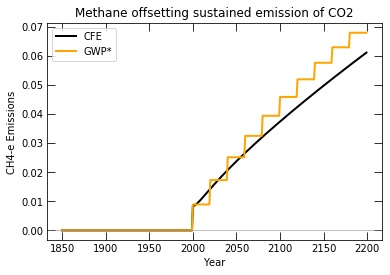

In [13]:
t = CO2StepTestEmissionsOutput['Year']
s = CO2StepTestEmissionsOutput['CFE']
v = CO2StepTestEmissionsOutput['GWP*']

fig, (ax) = plt.subplots()
ax.plot(t, s, color = 'black',linewidth = 2,label='CFE')
ax.plot(t, v, color = 'orange',linewidth = 2,label='GWP*')
ax.tick_params(axis='both',direction='in',length=8,right=True,top=True)
plt.legend()
ax.axhline(linewidth = 0.5, color='gray')

ax.set(xlabel='Year', ylabel='CH4-e Emissions',
       title='Methane offsetting sustained emission of CO2')
plt.show()

## Testing the GIR Input Style metric tool

This version takes in a range of scenarios and gases using the same format used in GIR. For each metric "method" specified a new "scenario" will be added to the returned dataframe for each original "scenario" in the GIR input. This allows us to quickly go from a multi-gas set of input emissions to a broad range of equivalents, and model their temperature impacts, without the need for reformatting.

Methods can include "CFE", "GWP*", "CGWP", "CGTP", "GWP100", "GWP20", "GTP100", "GTP20"

In [14]:
# GIRTestScenarioNames = ['Pulse','Step']

start_year = 1850
end_year = 2200
timestep = 1
scen_names=['Pulse','Step']
gases_in = ['CO2','CH4','N2O']

CO2GIREmissions = pd.DataFrame(index=np.arange(start_year,end_year+1,timestep)+(timestep!=1)*timestep/2,columns=pd.MultiIndex.from_product([scen_names,gases_in],names=['Scenario','Gas'])).fillna(0).apply(pd.to_numeric)
CO2GIREmissions.index.rename('Year',inplace=True)

TimePeriod = 351  # Years
Years = np.arange(1850, 2200).tolist()

# Pulse Emissions
PulseLLCPEmissions = np.zeros(TimePeriod).tolist()
PulseLLCPEmissions[150] = 1

# Step Emissions
StepLLCPEmissions = np.ones(TimePeriod).tolist()
StepLLCPEmissions[0:150] = np.zeros(150).tolist()

# Non-Metric Gas Emissions

CO2GIREmissions['Pulse','CO2'] = PulseLLCPEmissions
CO2GIREmissions['Step','CO2'] = StepLLCPEmissions

In [15]:
Methods = ["CFE", "GWP*"]

CH4eGIR = CH4efunctions.addCH4eMetricEmissions(CO2GIREmissions, Methods)

In [16]:
CH4eGIR.tail()

Scenario Pulse         Step         Pulse - CFE                Pulse - GWP*  \
Gas        CO2 CH4 N2O  CO2 CH4 N2O         CO2       CH4  N2O          CO2   
Year                                                                          
2196.0     0.0   0   0  1.0   0   0         0.0  0.000226  0.0          0.0   
2197.0     0.0   0   0  1.0   0   0         0.0  0.000226  0.0          0.0   
2198.0     0.0   0   0  1.0   0   0         0.0  0.000226  0.0          0.0   
2199.0     0.0   0   0  1.0   0   0         0.0  0.000226  0.0          0.0   
2200.0     0.0   0   0  1.0   0   0         0.0  0.000225  0.0          0.0   

Scenario                Step - CFE                Step - GWP*                 
Gas            CH4  N2O        CO2       CH4  N2O         CO2       CH4  N2O  
Year                                                                          
2196.0    0.000000  0.0        0.0  0.060431  0.0         0.0  0.067934  0.0  
2197.0    0.000000  0.0        0.0  0.060657  0.0         0.0  0.067934  0.0  
2198.0    0.000000  0.0        0.0  0.060883  0.0         0.0  0.067934  0.0  
2199.0    0.000000  0.0        0.0  0.061109  0.0         0.0  0.067934  0.0  
2200.0    0.004683  0.0        0.0  0.061334  0.0         0.0  0.072617  0.0

# Function to convert data units to those used in GIR input

As with many climate models GIR (and FaIR) takes input emissions series in units of GtC, MtCH4, and MtN2O-N2. This function can be used to quickly convert from MtX to the required unit.

In [7]:
# Convert to the correct units for GIR input: GtC, MtCH4, MtN2
GIRConversionCO2 = 12.0107/44.0095 # Convert MtCO2 -> GtC
GIRConversionCH4 = 1
GIRConversionN2O = 28.0134/44.013 # Convert MtN2O -> MtN2
K = 1000


def convertToGIRInputUnits(EmissionsScenarioInput):
    scenarios = EmissionsScenarioInput.columns.levels[0].to_list()
    gases = EmissionsScenarioInput.columns.levels[1].to_list()
    
    EmissionsScenarioOutput = EmissionsScenarioInput.copy()
    for scenario in scenarios:
        for gas in gases:
            if gas is 'CO2':
                EmissionsScenarioOutput[scenario,gas] = EmissionsScenarioOutput[scenario,gas]*GIRConversionCO2/K
            elif gas is 'CH4':
                EmissionsScenarioOutput[scenario,gas] = EmissionsScenarioOutput[scenario,gas]*GIRConversionCH4
            elif gas is 'N2O':
                EmissionsScenarioOutput[scenario,gas] = EmissionsScenarioOutput[scenario,gas]*GIRConversionN2O
            else:
                print("Error: Gas type not recognised when converting to GIR input units")
    
    return EmissionsScenarioOutput


# Testing the matrix method

## Making the AGFP matrix

In [24]:


# Make emissions series to test on this 250 years long. step at year 2000

TimePeriod = 249  # Years
SLCPEmissions = np.ones(TimePeriod).tolist()
SLCPEmissions[0:149] = np.zeros(150).tolist()
Years = np.arange(1850, 2100).tolist()

TestTimeSeries = pd.DataFrame(data={'Year': Years, 'SLCP Emissions': SLCPEmissions})

TestTimeSeries.head()

,Year,SLCP Emissions
0,1850,0.0
1,1851,0.0
2,1852,0.0
3,1853,0.0
4,1854,0.0


In [188]:
import numpy as np
import pandas as pd

CO2FEVMFs = pd.read_csv('CO2eMetricEmissions/CO2FEVectorMetric/CO2FEVectorMetricFactors.csv')[['CO2fe']]

# Make the lower-diagonal tirpitz matrix for conversion between gases.

CO2FEVMFsLength = len(CO2FEVMFs.index)
FullAGFP_CH4 = np.zeros((CO2FEVMFsLength, CO2FEVMFsLength))

for i in np.arange(CO2FEVMFsLength):
    for j in np.arange(i+1):
        FullAGFP_CH4[i][j] = CO2FEVMFs.loc[i-j]
FullAGFP_CH4

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.20039465e-02,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.88705417e-02, -1.20039465e-02,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.78152088e-05, -5.82749770e-05, -5.87419201e-05, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.73624966e-05, -5.78152088e-05, -5.82749770e-05, ...,
        -1.20039465e-02,  1.00000000e+00,  0.00000000e+00],
       [-5.69167233e-05, -5.73624966e-05, -5.78152088e-05, ...,
        -1.88705417e-02, -1.20039465e-02,  1.00000000e+00]])

In [22]:
RecoveredMatrix = pd.read_csv('CO2eMetricEmissions/CO2FEVectorMetric/CO2FEVectorMetricMatrix.csv', header=None).to_numpy()
RecoveredMatrix

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.20039465e-02,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.88705417e-02, -1.20039465e-02,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.68504202e-05, -2.68962313e-05, -2.69423263e-05, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.68048887e-05, -2.68504202e-05, -2.68962313e-05, ...,
        -1.20039465e-02,  1.00000000e+00,  0.00000000e+00],
       [-2.67596328e-05, -2.68048887e-05, -2.68504202e-05, ...,
        -1.88705417e-02, -1.20039465e-02,  1.00000000e+00]])

In [14]:
# resize AGFP multiplication matrix to mate with timeseries

# AGFP_CH4 = FullAGFP_CH4.copy()
AGFP_CH4 = RecoveredMatrix.copy()

pos1 = len(TestTimeSeries.index)
pos2 = AGFP_CH4.shape[0]

AGFP_CH4 = np.delete(AGFP_CH4, np.arange(pos1,pos2),0)
AGFP_CH4 = np.delete(AGFP_CH4, np.arange(pos1,pos2),1)

AGFP_CH4.size

62500

In [18]:
AGFP_CH4

array([[-1.20039465e-02,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.88705417e-02, -1.20039465e-02,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.40389509e-02, -1.88705417e-02, -1.20039465e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.15218891e-05, -9.25220453e-05, -9.35385107e-05, ...,
        -1.20039465e-02,  1.00000000e+00,  0.00000000e+00],
       [-9.05377708e-05, -9.15218891e-05, -9.25220453e-05, ...,
        -1.88705417e-02, -1.20039465e-02,  0.00000000e+00],
       [-8.95694233e-05, -9.05377708e-05, -9.15218891e-05, ...,
        -2.40389509e-02, -1.88705417e-02,  0.00000000e+00]])

In [87]:
GWP_STAR_MATRIX_CH4 = 112 * np.identity(250)
# GWP_STAR_MATRIX_CH4.size

for i in np.arange(21,250):
#     for i 
    GWP_STAR_MATRIX_CH4[i][i-20] = -105

In [88]:
GWP_STAR_MATRIX_CH4[0][20]

0.0

In [89]:
GWP_STAR_MATRIX_CH4.size

62500

In [90]:
len(np.dot(GWP_STAR_MATRIX_CH4,TestTimeSeries['SLCP Emissions']))

250

In [91]:
np.dot(GWP_STAR_MATRIX_CH4,TestTimeSeries['SLCP Emissions'])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 11

In [80]:
MatrixScale = 8
Value = 4300
CGWP_MATRIX_CH4 = Value * np.identity(MatrixScale)
for i in np.arange(1, MatrixScale):
    CGWP_MATRIX_CH4[i][i-1] = -Value

In [81]:
CGWP_MATRIX_CH4

array([[ 4300.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [-4300.,  4300.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0., -4300.,  4300.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0., -4300.,  4300.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0., -4300.,  4300.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0., -4300.,  4300.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0., -4300.,  4300.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0., -4300.,  4300.]])

In [105]:
PosValue = 112
NegValue = 105
GWP_STAR_MATRIX_CH4 = PosValue * np.identity(9)
for i in np.arange(5, 9):
    GWP_STAR_MATRIX_CH4[i][i-5] = - NegValue

In [106]:
GWP_STAR_MATRIX_CH4

array([[ 112.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,  112.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,  112.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,  112.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,  112.,    0.,    0.,    0.,    0.],
       [-105.,    0.,    0.,    0.,    0.,  112.,    0.,    0.,    0.],
       [   0., -105.,    0.,    0.,    0.,    0.,  112.,    0.,    0.],
       [   0.,    0., -105.,    0.,    0.,    0.,    0.,  112.,    0.],
       [   0.,    0.,    0., -105.,    0.,    0.,    0.,    0.,  112.]])